# Prediction Score Calculation


In [12]:
import pandas as pd
import numpy as np
import pickle

In [2]:
def map_per_image(label, predictions):
    """Computes the precision score of one image.

    Parameters
    ----------
    label : string
            The true label of the image
    predictions : list
            A list of predicted elements (order does matter, 5 predictions allowed per image)

    Returns
    -------
    score : double
    """    
    try:
        return 1 / (predictions[:5].index(label) + 1)
    except ValueError:
        return 0.0

In [3]:
def map_per_set(labels, predictions):
    """Computes the average over multiple images.

    Parameters
    ----------
    labels : list
             A list of the true labels. (Only one true label per images allowed!)
    predictions : list of list
             A list of predicted elements (order does matter, 5 predictions allowed per image)

    Returns
    -------
    score : double
    """
    return np.mean([map_per_image(l, p) for l,p in zip(labels, predictions)])

In [4]:
groundtruth = pd.read_csv("subset_test.csv")

In [5]:
groundtruth.head(10)

,Unnamed: 0,Image,Id
0,10114,6657fc566.jpg,w_d573a68
1,6614,43610ee69.jpg,w_3fe5d56
2,488,04a973240.jpg,w_11ff425
3,17021,ab104061d.jpg,w_bbfce38
4,3543,2453dea33.jpg,w_16def42
5,7207,491d5c1af.jpg,w_53feb91
6,25036,fc5c53caa.jpg,w_dd88965
7,23067,e880a0ac6.jpg,w_23a388d
8,19420,c3cb62502.jpg,w_76065ea
9,10974,6f65249d3.jpg,w_030e2cf


In [6]:
prediction = pd.read_csv('data/Predicted_labels_crop_aug.csv')

In [7]:
prediction.head(10)

,Image,Id
0,6657fc566.jpg,w_d573a68 w_0abdaf4 w_3815890 w_a780b2d w_c875e45
1,43610ee69.jpg,w_8799716 w_3fe5d56 w_4e13e82 w_3b03149 w_e99ed06
2,04a973240.jpg,w_11ff425 w_8ea9f68 w_336e046 w_01f14e1 w_ae8982d
3,ab104061d.jpg,w_9c506f6 w_3eae264 w_d947e85 w_bbfce38 w_e906edd
4,2453dea33.jpg,w_16def42 w_bff3c3b w_c0e27e9 w_007fefa w_9713cc3
5,491d5c1af.jpg,w_f8746c3 w_60cf87c w_edf0164 w_6525e6b w_53feb91
6,fc5c53caa.jpg,w_dd88965 w_51fc1fc w_fdd3687 w_0f8b8e2 w_16b5050
7,e880a0ac6.jpg,w_7aea0b8 w_8cad422 w_04003e9 w_3f7d5f5 w_5d5c6a6
8,c3cb62502.jpg,w_76065ea w_f0fe284 w_00d50c9 w_37d2f3a w_2137c6f
9,6f65249d3.jpg,w_2d6596f w_030e2cf w_0a155b9 w_d602efb w_749dffd


In [8]:
truthlabels = list(groundtruth['Id'])

In [9]:
predictlabels = list(prediction['Id'])
predictlabels = [candidate.split() for candidate in predictlabels]

In [10]:
predictlabels[5]

['w_f8746c3', 'w_60cf87c', 'w_edf0164', 'w_6525e6b', 'w_53feb91']

In [11]:
map_per_set(truthlabels, predictlabels)

0.728682405165456

Load the training history and plot the loss and accuracies.

In [13]:
with open("data/training_history_crop_aug.pkl", 'rb') as f:
    history = pickle.load(f)

In [14]:
history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

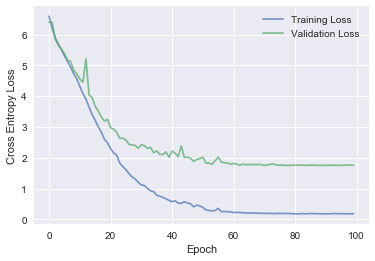

In [19]:
sns.set()
plt.figure()
plt.plot(history['loss'], label="Training Loss", alpha=0.7)
plt.plot(history['val_loss'], label="Validation Loss", alpha=0.7)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")
plt.savefig("Loss_Plot.pdf")

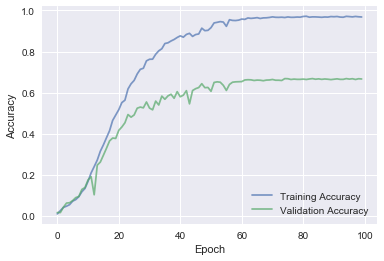

In [20]:
sns.set()
plt.figure()
plt.plot(history['acc'], label="Training Accuracy", alpha=0.7)
plt.plot(history['val_acc'], label="Validation Accuracy", alpha=0.7)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.savefig("Accuracy_Plot.pdf")